# Lab 2 - Clustering
Esraaj Sarkar Gupta

In [7]:
# ---- Imports and Helpers ---- #
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

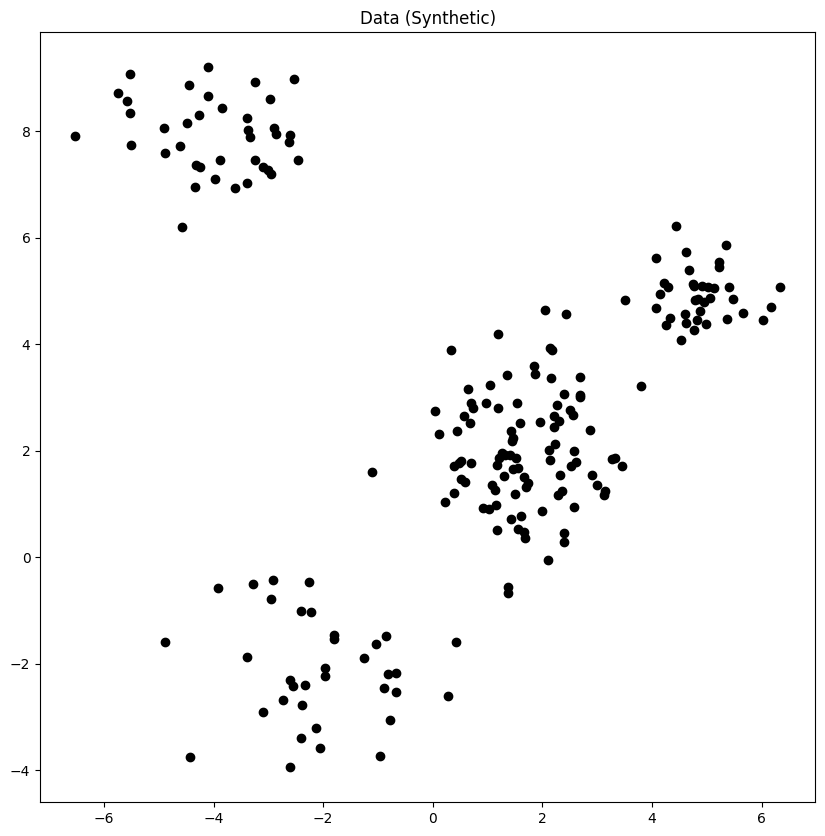

In [8]:
# ---- Generate Synthetic Data ---- #

# Purely random sampling of a 100 x 100 R2 space

np.random.seed(24)  # Because 24 is objectively the best number
                    # Also for reproducability

# Define number of clusters
_NUMBER_OF_CLUSTERS : int = 4

CLUSTER_MEANS : list[tuple[float,float]] = list([
    (2,2), (5,5), (-2,-2), (-4,8)
])

CLUSTER_COVS : list[np.ndarray] = list([
    np.array([
        [0.9, -0.0255],
        [-0.0255, 0.9]
    ]),
    np.array([
        [0.5, 0],
        [0, 0.3]
    ]),
    np.array([
        [1, 0],
        [0, 0.9]
    ]),
    np.array([
        [0.8, 0],
        [0, 0.6]
    ])
])


# Generare multivariate Gaussian Data
data : list = list([])
for i in range(_NUMBER_OF_CLUSTERS):
    number_of_datapoints : int = int(np.random.rand() * 100)
    for _ in range(number_of_datapoints):
        data.append(
            tuple((
                np.random.multivariate_normal(CLUSTER_MEANS[i], CLUSTER_COVS[i])
            ))
        )

# Display data
plt.figure(figsize=(10,10))
x,y = zip(*data)
plt.scatter(x,y, color = 'black')

plt.title("Data (Synthetic)")

plt.show()


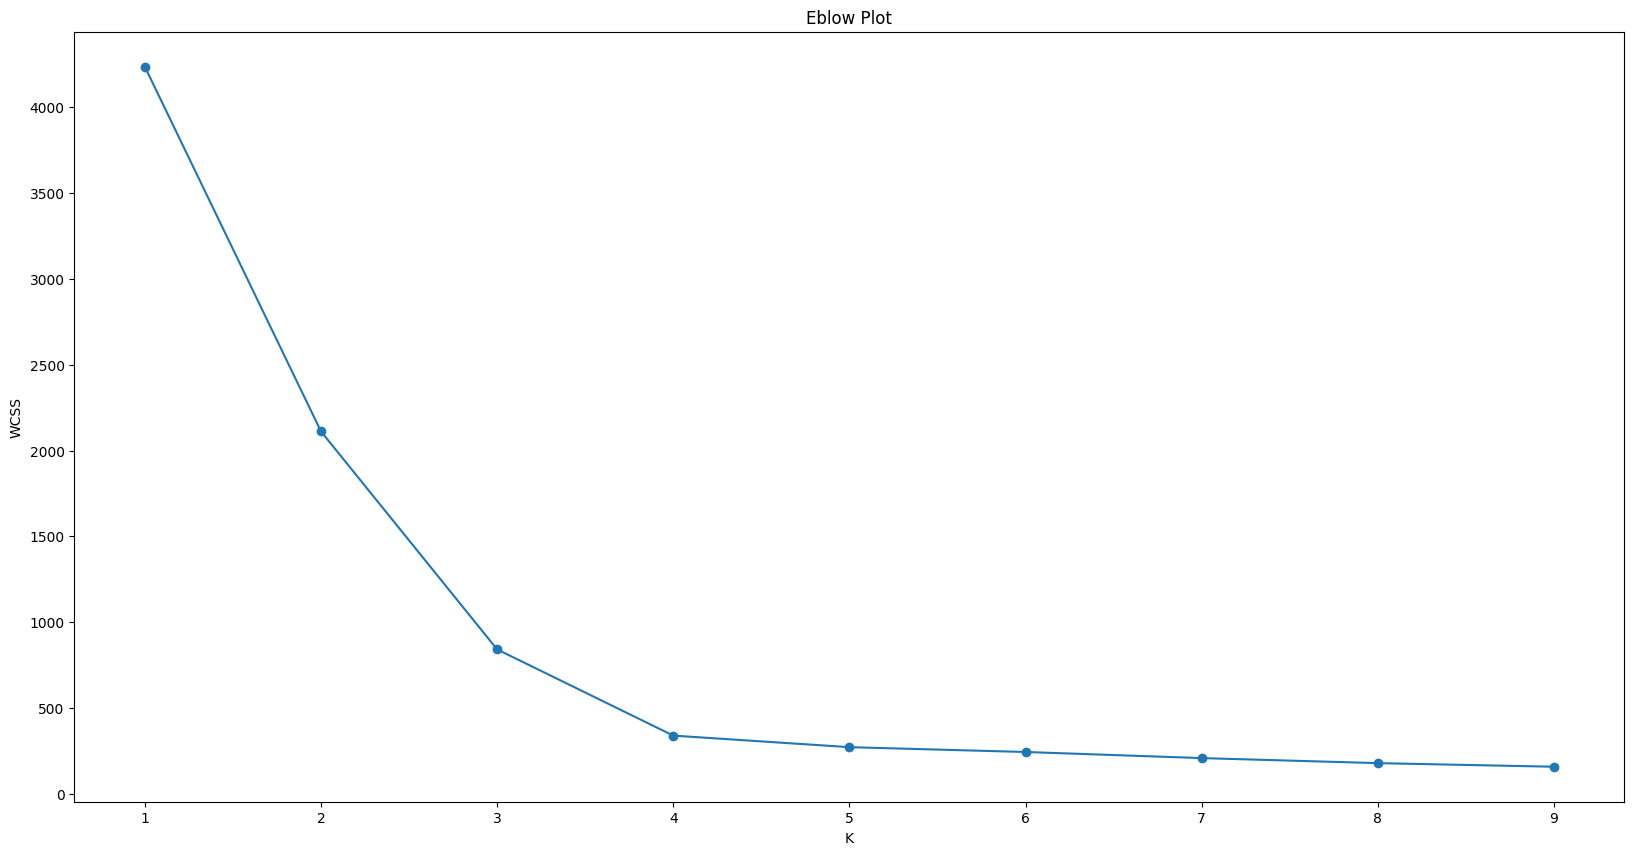

In [9]:
# ---- Compute WCSS and Optimal K ---- #


# Generate Elbow Plot

def ElbowPlot(data : list, K_values : list[int]):
    WCSS : list[float] = list([])
    for K in K_values:
        kmeans = KMeans(
            n_clusters=K,
            random_state=24, # Seed for reproducability (and 24 is a good number :D)
            n_init=2 # Reproduce only once for efficiency
        )
        
        # Carry out clustering
        kmeans.fit(data)

        # Append WCSS
        WCSS.append(
            kmeans.inertia_
        )

    plt.figure(figsize=(20,10))
    plt.plot(K_values, WCSS,  marker='o')

    plt.xlabel("K")
    plt.ylabel("WCSS")
    plt.title("Eblow Plot")

    plt.show()

ElbowPlot(data, list(range(1, 10)))
    

#### Result: From the elbow plot above one may conclude that the optimal number of clusters is $K = 4$.

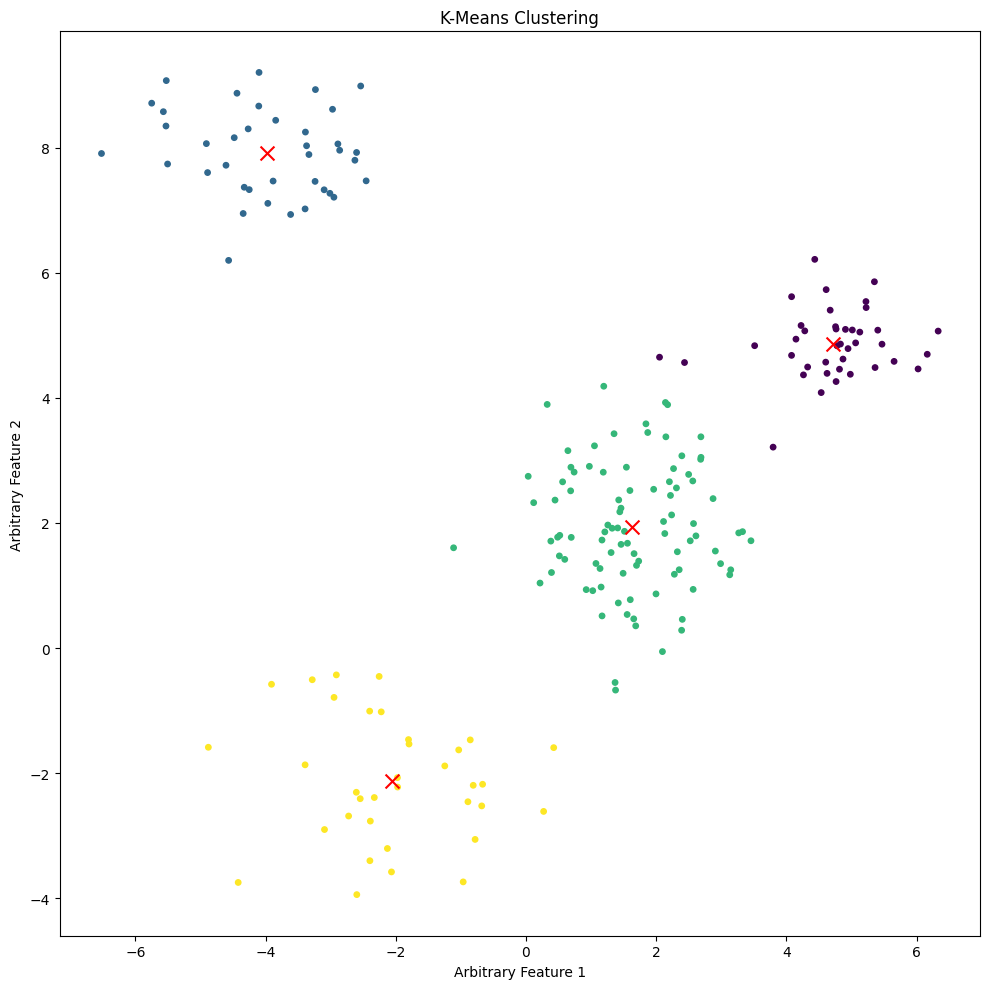

In [10]:
# ---- Optimal KMeans Clustering ---- #

#Typesetting

X = np.array(data, dtype=float)   # shape (n_samples, 2)


kmeans = KMeans(
            n_clusters=4,
            random_state=67, # 67 is the new trending number isn't it?
            n_init=10
        )

kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_


plt.figure(figsize=(10,10))

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=labels, s=15)
# Plot the KMeans centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color = 'red', s=100)

plt.xlabel("Arbitrary Feature 1")
plt.ylabel("Arbitrary Feature 2")
plt.title("K-Means Clustering")

plt.tight_layout()
plt.show()

## Report

1) If there are too many clusters passed to the KMeans algorithm, then the same true cluster may be arbitrarily divided into two clusters. Alternatively, with too few clusters, multiple true clusters may be accidentally grouped into a single cluster.

2) Initialising the initial centroids too close together might cause erronious clustering -- a single true cluster may be divided into multiple clusters since centroids close together will compete for points. This may result in poor convergence. Keeping the initial centroids far apart allows the algorithm to efficiently explore the entire parameter space. This might result in faster convergence and a lower WCSS solution.

3) One may optimize the process of initializing centroids by running the algorithm multiple times (as done here using `n_init`). One may use KMeans++, where the centroids are not fully random -- selected points are spread apart.

4) The Eblow-Plot Method may not always show a clear change of slope (or an elbow) when there is a smooth decline in WCSS. It may also fail when clusters overlap or the data lacks a cluster structure. The point of change may be subjective given that this method lacks a strict mathematical definition.

5) Noise will have great distances compared to all the centroids and thus massively contribute to the WCSS by increasing within-cluster separation. Outliers may inflate WCSS for any value of K and drag clusters towards them (disturbing cluster quality). It is important to remove noise effectively during data preprocessing.